-----

<img src='http://localhost:8888/files/m2_%EB%B6%84%EC%84%9D%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%ED%99%9C%EC%9A%A9/Pandas/dataset/%EB%AA%A9%ED%91%9C.jpg' STYLE='width:500px;'>

개발자 : 진청아

--------------------

## '목표 달성! 공부 도우미' (목공도) 프로그램은 ...
#### 목표 달성을 위한 공부 시간을 효율적으로 쓸 수 있게 도와주는 프로그램입니다.

#### 시험 공부를 하는 학생, 수험생 그리고 틈틈히 자격증 공부를 하는 직장인에게 
#### 도움을 줄 수 있는 시간 관리 서비스를 제공하고 있습니다. 

## 목공도의 기대 가치는?
#### - 체계적인 시간 관리
#### - 집중력 향상
#### - 효율성 36% ↑ (연구자료: 2021, An analysis of productivity app strengths: An environmental scan)

## 목공도의 서비스는?
#### - 목표 성공시 자신에게 말해주고 싶은 메모 기능 (성공시 알림이 뜹니다. )
#### - 공부 스톱워치 및 휴식 온/오프 기능 
#### - 공부 자극 '오늘의 공부 명언' 서비스 
#### - 과거 날짜별 공부 및 휴식 그래프 
#### - 과거와 현재 목표 내역 및 남은 날짜&공부시간 계산, 성공/실패 여부

##  목공도 프로그램 메뉴:
    
    1. 목표 정의
       1.1 목표 사항 
           1.1.1 목표 제목
           1.1.2 목표 메모
           1.1.3 목표 날짜
           1.1.4 목표 공부량 (분 단위)
       
    2. 공부 스톱워치
       2.1 스톱워치 시작 
       2.2 휴식 온/오프
       2.3 스톱워치 종료
       
    3. 목표 리스트 (과거와 현재진행형 목표들을 리스트로 보여준다.)
       3.1  목표 제목
       3.2  목표
       3.3  목표 총 공부한 시간 (분 단위)
       3.4  성공/실패 여부
       3.5  날짜 
       3.6  디데이
       
    4. 공부와 휴식 그래프 
       4.1 날짜별 총 공부 시간 
       4.2 날짜별 총 휴식 시간 

--------------

In [1]:
import os
from datetime import datetime
import time
import pandas as pd
import datetime
from datetime import datetime 
from datetime import timedelta
import matplotlib.pyplot as plt
import glob
import re
import random

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
# 프로그램 관련 파일들은 전부 aim_list 에 넣습니다.
os.getcwd()
os.chdir("C:\\Cakd7\\aim_list")
os.getcwd()

'C:\\Cakd7\\aim_list'

# 1. 목표 정의

## 1.1 목표 사항 

#### 1.1.1 목표 제목

####   1.1.2 목표 메모
       
####   1.1.3 목표 날짜
       
####   1.1.4 목표 공부량 (분 단위)

Aim_defintion 클래스에서 위와 같이 목표 사항을 정의할 수 있다. 

 1. Aim_defintion의 객체를 만들 때 제목,메모,날짜,공부량을 기재한후 함수를 실행시킨다.
 2. init 함수가 변수를 각각 받은 후, save_aim 함수를 부른다. 
 3. save_aim 함수는 기재한 목표 사항을 저장할 것 인지 물어본다. 승인하면 정보를 임시 딕셔너리에 넣어 새 txt 파일에 저장한다. 
    딕셔너리 key는 4개이다 (목표,메모,날짜,목표_공부량)
 4. 목표 프로세스를 시작할려면 test.start_aim 함수를 실행시켜야 한다. 이 함수에서는 총 공부시간과 휴식시간을 저장할 수 있는 데이터프레임이     만들어지는데, 아직 값이 없는 빈 데이터프레임이 만들어진다. 

# 2. 공부 스톱워치 

#### 2.1 스톱워치 시작 (def start_study)

#### 2.2 휴식 온/오프 (def start_pause)

#### 2.3 스톱워치 종료 (def stop_study)

1. Today_schedule 객체 test 를 만든다. 변수로는 공부할 목표 이름과 날짜를기입한다.
2. 오늘 하루 공부한 시간과 휴식 시간을 저장할 임시 데이터프레임을 만든다. 
   데이터 프레임의 열은 목표날짜까지의 날짜 열이고 첫번째 행은 총 휴식시간 두번째 행은 총 공부시간을 저장한다.
3. start_study 함수를 실행시키면 공부 스톱워치가 시작됩니다.
4. start_pause 함수는 휴식 시간을 정할 수 있습니다. 휴식은 원하는 만큼 가질 수 있고, 휴식 시간은 데이터 프레임에 업데이트 되어 누적된 시간이 저장됩니다. 
5. stop_study 함수는 공부스톱워치를 종료시킵니다. 공부 마친 시간에서 공부 시작 시간을 빼고 난 후, 총 휴식 시간 마저 차감해서 계산합니다.
   계산된 총 공부 시간을 데이터 프레임에 저장합니다. 

 time.sleep() 을 이용하여 스톱워치 기능을 재현합니다.  

In [3]:
print(">> 목표 제목, 성공 메모, 날짜 그리고 목표 공부량(분 단위)을 기재해 주세요.")

class Aim():
    
    global time_df # today dictionary
    global today
    global start_study_time
    
    today = datetime.now().strftime('%Y/%m/%d')
    study_pause_records = {}
    
    def __init__(self, title, memo, ddate, studytime): # 목표 제목, 메모, 날짜, 목표 공부량을 설정합니다.
        self.title = title
        self.memo = memo
        self.ddate = ddate
        self.studytime = studytime
        
        # 입력한 내용을 다시 한번 확인합니다. 
        print(f'''                              
        
        입력하신 정보
        ☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰
        
        목표: {self.title}
        성공 메모: {self.memo}
        날짜(yyyy/mm/dd): {self.ddate}
        목표 공부량 (분): {self.studytime}
        
        ☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰
        
        ''')
        
        Aim.save_aim(self) # 목표 저장 여부를 묻습니다.
        
        
    def save_aim(self): # init 에서 실행됩니다.

        aim_dict = {'목표': 'txt' , '메모': 'txt', '날짜': 'txt', '목표_공부량': 0}
        
        y_n = input(f">> 목표를 저장하시겠습니까? ( Y / N )\n") # 입력한 목표 저장 여부를 묻습니다.
        if y_n == "Y" or y_n =='y':
            # 만든 aim_dict 딕셔너리에 기재된 정보를 넣습니다.
            aim_dict["목표"] = {self.title}
            aim_dict["메모"] = {self.memo}
            aim_dict["날짜"] = {self.ddate}
            aim_dict["목표_공부량"] = {self.studytime}
            
            with open( f'{self.title}.txt' ,"w") as f: # 새 txt 파일을 만들어 정보를 외부에 저장합니다.
                
                for i,j in aim_dict.items():
                    f.write(f'{i} : {j} \n')
                    
                print(">> 저장 완료되었습니다.\n")
                
        elif y_n == "N" or y_n =='n':
            print(">> 저장 실패하였습니다.\n")
        else :
            print(">> Y / N 중 둘중에 하나만 선택해주세요.\n")
            Aim.save_aim(self) # 재귀함수: 잘못된 입력으로 저장 여부를 다시 묻습니다.
                
        
    def start_aim(self): # 목표 시작 여부를 묻습니다.
        y_n = input(f">> {self.title} 공부 프로세스를 시작하겠습니까? ( Y / N )\n")
        if y_n == "Y" or y_n =='y':
            print(">> 시작!\n")
            study_pause_df =pd.DataFrame() 
            #csv 파일에 비어있는 데이터프레임을 미리 만들어 놓습니다.
            study_pause_df.to_csv(f'{self.title}.csv', index=None) 
            
        elif y_n == "N" or y_n =='n':
            print(">> 다음에...\n")
        else :
            print(">> Y / N 중 둘중에 하나만 선택해주세요.\n")
            Aim.start_aim(self) # 잘못된 입력으로 다시 시작 여부를 묻습니다. 
            
            
    def create_time_df(self): 
        
        daystilddate = []
        d_day= datetime.strptime(self.ddate, '%Y/%m/%d')
        date_diff = d_day-datetime.now()
        time_df = pd.DataFrame(index = ['휴식','공부'])
        date_diffdays = date_diff.days
        for i in range(date_diffdays+1):
            date_delta = timedelta(days=i)
            day = datetime.now()+ date_delta
            day = day.strftime('%Y/%m/%d')
            time_df[day] = 0 # default 
            
        time_df.to_csv(f'{self.title}.csv')
                       
                       
    # 공부 스톱워치를 시작합니다. 
    def start_study(self): 
        global start_study_time
        
        print(">> 공부를 스톱워치를 시작하겠습니다.\n")
        start_study_time = datetime.now()
        Aim.create_time_df(self) # 공부 합산 시간과 휴식 합산 시간 기록을 저장할 임시 df 을 만듭니다.
                       
                       
        print("☆★☆ 오늘의 명언 ☆★☆\n")
        print('-----------------------------------------------------------\n')
        
        os.chdir("C:\\Cakd7\\aim_list\\공부명언") 
        with open( 'quotes.txt' ,"r",encoding="UTF-8") as f:
            quotes=f.readlines()
            random_number = random.randint(0, 9) # 랜덤 명언 뽑기
            print(quotes[random_number])
        os.chdir("C:\\Cakd7\\aim_list")
        
        print('-----------------------------------------------------------\n')
        
    def start_pause(self): 
        
        print(">> 현재 시간은", datetime.now().strftime('%Y/%m/%d %H:%M:%S'), "입니다. \n")
        pause = input(">> 몇분 휴식을 취하시겠습니까? \n") # 분
        start_pause_time = datetime.now()
        start_pause_time1 = datetime.now().strftime('%H:%M:%S') # 아래 프린트에서 더 깔끔하게 보여주기 위해
        print(f'>> {start_pause_time1} 부터 {pause} 분간 휴식이 있겠습니다.\n')
        time.sleep(int(pause)) # 초에서 분 단위로 바꿔준다.
        end_pause_time = datetime.now()
        print(">> 휴식이 끝났습니다. 공부를 다시 이어가세요! \n") # 주어진 휴식 시간이 끝나면 알람을 받습니다.

        pause_result = int(pause)
        
        # 휴식을 가질 때마다 데이터프레임에 누적된 휴식시간을 업데이트 해줍니다.
        time_dff = pd.read_csv(f'{self.title}.csv',index_col=0)
        expause = time_dff.iloc[0].loc[today]
        newpause = expause + pause_result
        time_dff.iloc[0].loc[today] = newpause
        time_dff.to_csv(f'{self.title}.csv')
                       
                       
    def stop_study(self):
        print(">> 공부 스톱워치를 종료합니다. \n")
        stop_study_time = datetime.now() 
        
        time_dff = pd.read_csv(f'{self.title}.csv',index_col=0)
        pause_sum = time_dff.iloc[0].loc[today] # 마지막에 데이터프레임에서 총 휴식 시간을 읽어옵니다.
        temp_total_studytime =stop_study_time-start_study_time
        temp_total_studytime = (temp_total_studytime.seconds)/60 # 분단위로 바꿉니다.
        total_studytime= temp_total_studytime - pause_sum 
        
        time_dff.iloc[1].loc[today] = total_studytime
        time_dff.to_csv(f'{self.title}.csv')
   
        
        print("오늘 총 공부 시간:\n")
        print(f'{round(total_studytime,2)} 분 입니다.')
    
        
        if time_dff.iloc[1,:].sum() >= self.studytime:
            print("⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑\n")
            print(">> 목표 공부량을 해냈습니다. 축하드립니다! 🙆")
            with open( f'{self.title}.txt' ,"r") as f:  # 성공메모 꺼내오기
                lines = f.readlines()
                memo = lines[1]
                print(memo)
            print("⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑\n")
    
        
        
test = Aim("마파두부시험","공부 열심히 했으니 이제 마라탕", '2022/07/10', 70 )
test.start_aim()

>> 목표 제목, 성공 메모, 날짜 그리고 목표 공부량(분 단위)을 기재해 주세요.
                              
        
        입력하신 정보
        ☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰
        
        목표: 마파두부시험
        성공 메모: 공부 열심히 했으니 이제 마라탕
        날짜(yyyy/mm/dd): 2022/07/10
        목표 공부량 (분): 70
        
        ☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰
        
        
>> 목표를 저장하시겠습니까? ( Y / N )
y
>> 저장 완료되었습니다.

>> 마파두부시험 공부 프로세스를 시작하겠습니까? ( Y / N )
y
>> 시작!



In [4]:
test.start_study() # 공부 스톱워치 시작
test.start_pause() # 첫번째 휴식
test.start_pause() # 두번째 휴식

>> 공부를 스톱워치를 시작하겠습니다.

☆★☆ 오늘의 명언 ☆★☆

-----------------------------------------------------------

용감하게 행동하라. 세상은 확신을 갖고 행동하는 사람을 위해 길을 비켜준다. - 마이클 조던

-----------------------------------------------------------

>> 현재 시간은 2022/07/01 19:45:06 입니다. 

>> 몇분 휴식을 취하시겠습니까? 
1
>> 19:45:08 부터 1 분간 휴식이 있겠습니다.

>> 휴식이 끝났습니다. 공부를 다시 이어가세요! 

>> 현재 시간은 2022/07/01 19:45:09 입니다. 

>> 몇분 휴식을 취하시겠습니까? 
1
>> 19:45:11 부터 1 분간 휴식이 있겠습니다.

>> 휴식이 끝났습니다. 공부를 다시 이어가세요! 



In [5]:
test.stop_study() #공부 스톱워치 종료

>> 공부 스톱워치를 종료합니다. 

오늘 총 공부 시간:

-1.92 분 입니다.


# 3. 목표 리스트

#### 3.1  목표 제목
   
#### 3.2  목표
   
#### 3.3  목표 총 공부한 시간 (분 단위)
   
#### 3.4  성공/실패 여부
   
#### 3.5  디데이 
   
#### 3.6  디데이까지 남은 시간 (분 단위)

1. aim_list 폴더에 있는 모든 txt 파일을 불러옵니다. 
2. 목표 csv 파일에서 실제 공부했던 시간을 읽어옵니다.
3. txt 파일에서 목표 공부량을 불러옵니다.
4. 목표 공부량이 실제 공부했던 시간보다 클 경우 = 실패, 그렇지 않을 경우 = 성공
5. 오늘부터 목표 날짜까지 남은 시간을 계산하기 위해 txt 파일에 있는 목표 날짜를 읽어옵니다. 
6. 위에서 구한 모든 정보들을 정리하여 리스트로 나열합니다. 

In [6]:
class Aim_list():
    
    def __init__(self):
        
        aim_list = list(glob.glob('*.txt'))
        temp_study_live = []
        temp_study_aim = []
        temp_leftstudytime = []
        date_study = []
        days_left = []
        

        for i in aim_list: 
    
            i = i[:-4]
            
            df = pd.read_csv(f'{i}.csv', index_col=0) # 실제 공부량
            total_study_time = df.iloc[1].sum()
            temp_study_live.append(round(total_study_time,2))
            
            
            with open( f'{i}.txt' ,"r") as f:  # 목표 공부량
                lines = f.readlines()
                study_time_aim = lines[3]
                
                p = re.compile('\d+') # 4번째 줄에서 숫자만 추출 
                study_time_aim = p.findall(study_time_aim)
                study_time_aim= int(study_time_aim[0])

                if int(study_time_aim) > total_study_time: # 실패 / 성공 여부 확인하기 
                    success_fail = '실패'
                else:
                    success_fail = '성공'
                    
                temp_study_aim.append(success_fail)
                
                #목표공부량까지 남은 공부 시간 
                leftstudytime = int(study_time_aim) - total_study_time
                temp_leftstudytime.append(leftstudytime)
                
            
            with open( f'{i}.txt' ,"r") as f:  # 목표 날짜 읽어오기
                
                lines = f.readlines()
                dday = lines[2]
                
                p = re.compile('\d+/\d+/\d+') # 날짜만 추출 
                dday = p.findall(dday)
                dday = dday[0]
                dday= datetime.strptime(dday,'%Y/%m/%d')

                    
                date_study.append(dday)
                days_left.append((dday- datetime.now()).days) # 오늘로부터 날짜까지 남은 시간 = 디데이
        
        # 목표 리스트
        x=0
        print("✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤")
        print("목표 제목  :  총 공부 시간 (분)  :   성공/실패  :      목표 날짜      :       디데이(D-Day)      :    디타임(D-Time)")
        print("---------------------------------------------------------------------------------------------------------------------")
        while x < len(aim_list):    
            
            print(aim_list[x][:-4],"  :      ",temp_study_live[x],"        :  " , temp_study_aim[x], ":    ", date_study[x], "   :       ", days_left[x], "                 :    ", temp_leftstudytime[x])
            x+=1
            
        print("✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤")

In [7]:
test4 = Aim_list() # 목록 보기 

✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤
목표 제목  :  총 공부 시간 (분)  :   성공/실패  :      목표 날짜      :       디데이(D-Day)      :    디타임(D-Time)
---------------------------------------------------------------------------------------------------------------------
마파두부시험   :       0         :   실패 :     2022-07-10 00:00:00    :        8                  :     70
✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤✤


# 4. 공부와 휴식 그래프 
#### 4.1 날짜별 총 공부 시간 

#### 4.2 날짜별 총 휴식 시간 

- 목표 디데이까지 날짜별 공부 시간과 휴식 시간을 한눈에 잘 보일 수 있게 그래프로 표현합니다.

### 그래프 보안 필요!!

In [25]:
class Study_graph():

    today = datetime.now().strftime('%Y/%m/%d')
    
    def __init__(self,title):
        self.title = title
        time_dff = pd.read_csv(f'{self.title}.csv',index_col=0)
        
        plt.title(label=f"STUDY / BREAK GRAPH",fontsize=25, color="black")
        
        pause_line = time_dff.loc["휴식",:today]
        study_line = time_dff.loc["공부",:today]  # time_dff.iloc[1]
        pause_line_future = time_dff.loc["휴식",today:]
        study_line_future = time_dff.loc["공부",today:]  # time_dff.iloc[1]
        
        pause_line_future.plot.line()
        pause_line.plot.line()
        study_line.plot.line()
        ####
        
        
        print("하루 평균 휴식 시간:")
        print(round(sum(pause_line) / len(pause_line)),"분")
        print("하루 평균 공부 시간:")
        print(round(sum(study_line) / len(study_line)),"분")

하루 평균 휴식 시간:
23 분
하루 평균 공부 시간:
400 분


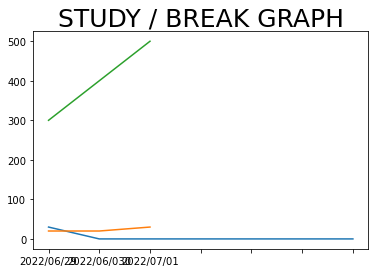

In [26]:
test4 = Study_graph('마파두부시험')

## 프로그램 보안

- 곳곳에 에러 방지 필요